# EDA on 1000 Movies

## Table of Contents

<a id='section_0'></a>
1. [**Problem Statement**](#section_1)
2. [**Importing Packages**](#section_2)
3. [**Loading Data**](#section_3)
  - 3.1 [Description of the Datasets](#section_3.1)
  - 3.2 [Pandas Profiling before Data Preprocessing](#section_3.2)
4. [**Data Preprocessing**](#section_4)
    - 4.1 [Profile report findings](#section_4.1)
    - 4.2 [Examining the dataset](#section_4.2)
    - 4.3 [Data Preprocessing](#section_4.3)
    - 4.4 [Pandas Profiling after Data Preprocessing](#section_4.4)
5. [**Exploratory Data Analysis**](#section_5)
    -  5.1 [**Analysis based on movie directors**](#section_5.1)
       - 5.1.1 [Top directors with higher Revenue](#section_5.1.1)
       - 5.1.2 [Top directors with higher Votes](#section_5.1.2)
       - 5.1.3 [Top directors with higher Rating](#section_5.1.3)
       - 5.1.4 [Top directors with higher Metascore](#section_5.1.4)
    -  5.2 [**Analysis on runtime of movies**](#section_5.2)
        - 5.2.1 [How long movie run time is generally ? ](#section_5.2.1)
        - 5.2.2 [Which interval of Runtime receives higher revenue ? ](#section_5.2.2)
    -  5.3 [**Analysis of movie Genres**](#section_5.3)
       - 5.3.1 [Top genres by movie count](#section_5.3.1)
       - 5.3.2 [Top genres by revenue](#section_5.3.2)
    -  5.4 [**Analysis of Movie Industry growth**](#section_5.4)
       - 5.4.1 [Is the number of movies increasing over the years ?](#section_5.4.1)
       - 5.4.2 [Is the revenue from movies increasing over the years ?](#section_5.4.2)
       - 5.4.3 [Is the average revenue of the movies increasing over the years ?](#section_5.4.3)
       - 5.4.4 [Is the popularity of the movies increasing over the years?](#section_5.4.4)
       
6. [**Conclusion**](#section_6)
7. [**Actionable Insights**](#section_7)

<a id='section_1'></a>
## 1. Problem Statement                  
> MS Films, a film production company, wants to produce successful movies. The company wants to make sure that any new movie should be liked by the viewers and critics and it should generate good revenue. The company wants to know the features of a movie to be considered to achieve this goal.

>Mr Manoj Singh, a data scientist has been given this project to provide the recommendation to the company. He has been provided database of 1000 movies.

<a id='section_2'></a>
## 2. Importing Packages

In [1]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column

import pandas_profiling as pdpf

pd.options.display.max_columns = 50                 # To display every column of the dataset in head()
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

C:\Users\IVCSPL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


<a id=section_3></a>
# 3. Loading Data

In [2]:
# Create an completely empty Dataframe without any column names, indices or data
df_movies = pd.DataFrame()

# Laoding the dataset:
try:
    # load dataset from the online source
    df_movies = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv')
except:
    # There is some error while loading dataset from online source
    print("Something went wrong while loading the online file.")
    # Since it is afailure to load form online, use the local copy,
    print('Loading the local file...')
    df_movies = pd.read_csv('1000 movies data.csv')

# print the head rows to preview the reords 
df_movies.head(2)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron",2012,124,7.0,485820,126.46,65.0


<a id='section_3.1'></a>
### 3.1 Description of the Dataset

- The dataset contains data of 1000 most popular movies as per IMDB rating for the period 2006-2016.
- Below is the details explaining the various columns of the dataset:

| Columns           | Description                                                 |
|-------------------|:-----------------------------------------------------------:|
|Rank               | Movie rank order                                            |
|Title              | The title of the film                                       |
|Genre              | A comma-separated list of genres used to classify the film  |
|Description        | Brief one-sentence movie summary                            |
|Director           | The name of the film's director                             |
|Actors             | A comma-separated list of the main stars of the film        |
|Year               | The year that the film released as an integer.              |
|Runtime (Minutes)  | The duration of the film in minutes.                        |
|Rating             | User rating for the movie 0-10                              |
|Votes              | Number of votes                                             |  
|Revenue (Millions) | Movie revenue in millions                                   |
|Metascore          | An aggregated average of critic scores. Values are between 0 and 100. Higher scores represent positive reviews.|



<a id=section_3.2></a>
### 3.2 Pandas Profiling before Data Preprocessing

- Performing **Pandas Profiling before preprocessing** our dataset, saving **output file** as __movies_profiling_before_preprocessing.html__.

In [3]:
# To output the pandas profiling report on the notebook.
profile = pdpf.ProfileReport(df_movies, title='Pandas Profiling before Data Preprocessing', html={'style':{'full_width':True}})

# Saving the output as profiling_before_preprocessing.html
profile.to_file(output_file="movies_profiling_before_preprocessing.html")

<a id=section_4></a>
## 4. Data Preprocessing

<a id='section_4.1'></a>
### 4.1 Profile report findings

- **Profile report shows missing data as follows:**
 - **Revenue (Millions)** has **128 (12.8%)** missing values and a single zero value
 - **Revenue (Millions)** has a **single zero** value
 - The distribution of **Revenue (Millions)** is positive **(right) skewed**.
 - **Revenue (Millions)** has 128 (12.8%) missing values and a single zero value
 - **Metascore** has 64 (6.4%) missing values
 - **Title** has duplicate values of **"The Host"**

<a id='section_4.2'></a>
### 4.2 Examining the dataset

In [4]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


- ```info``` function gives us the following insights into the df_movies dataframe:

  - There are a total of **1000 rows** and **12 columns** in the dataframe.
  
  - There are **7 columns** with a **numeric** datatype and **5 columns** of **object** datatype.
  
  - There are **missing** values in the **Revenue(Millions)** and **Metascore** column.

In [5]:
df_movies.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


 -```describe``` function gives us the following insights into the data:
  
  - **Runtime(Minutes)** column is having an **almost normal distribution** because the **mean (113.172)** value is close to the **median (111)** value.
  
  - **Rating** and **Metascore** column is having a **normal distribution** because their **mean** value is very close to their **median (50%)** value.

  - The distribution of **Votes** is **positive (right) skewed** because the **mean** of **votes (1.698083e+05)** lies to the **right** of the **median(50%)** value **(1.107990e+05)**. 
  
  - The distribution of **Revenue (Millions)** is **positive (right) skewed** because the **mean** value **(82.956)** lies to the **right** of the **median(50%)** value **(47.985)**. 
  
  - The **max** value of **Revenue (Millions) (936.630)** is an **outlier** because it lie far away from the mean.

<a id='section_4.3'></a>
### 4.3 Data Preprocessing

- Here we will perform **Data Preprocessing** on our dataset, to make the data usable for **EDA**.
- As noted, there are missing values and zeros in columns **Revenue (Millions)** and **Metascore**. 
- Both the columns are important and can not be dropped. Therefore we will fix the missing values and zeros


> - **"Revenue (Millions)" has 128 (12.8%) missing values. We can not ignore these values for EDA, so we need to fill the missing values.**
> - **Since the distribution of "Revenue (Millions)" is right skewed. We can fill the missing values and zeros with the median value**
> - **"Metascore" has 64 (6.4%) missing values. We can remove the missing value rows of this columns**

In [6]:
df_movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th.,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richardson, Jessica Sula",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling theater impresario's attempt to save his theater with a singing competition becomes grander than he anticipates even as its finalists' find that their lives will never be the same.",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth MacFarlane, Scarlett Johansson",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of the most dangerous incarcerated super-villains to form a defensive task force. Their first mission: save the world from the apocalypse.,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola Davis",2016,123,6.2,393727,325.02,40.0


In [7]:
# Filling the missing values in column 'Revenue (Millions)' with the median value
revenue_median = df_movies['Revenue (Millions)'].median()
df_movies['Revenue (Millions)'].fillna(value=revenue_median, inplace=True)
df_movies['Revenue (Millions)'].replace(0, revenue_median, inplace=True)

In [8]:
# Removing the rows that having missing values in column 'Metascore'
df_movies.dropna(subset=['Metascore'], inplace=True)

In [9]:
# Removing columns 'Description' and 'Actors' since they are not to be analysed
df_movies.drop(['Description','Actors'], axis = 1, inplace=True)

In [10]:
# Rename the columns 'Runtime (Minutes) and 'Revenue (Millions)' for quick reference
df_movies.rename(columns={'Runtime (Minutes)' : 'Runtime', 'Revenue (Millions)': 'Revenue'}, inplace=True)

In [11]:
# Check the head entries to see the changes
df_movies.head()

,Rank,Title,Genre,Director,Year,Runtime,Rating,Votes,Revenue,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",M. Night Shyamalan,2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family",Christophe Lourdelet,2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,2016,123,6.2,393727,325.02,40.0


In [12]:
# Checking if the 'Title' has duplicate values of "The Host"
df_movies.loc[df_movies['Title'] == 'The Host']
# There is no duplicate row for iitle "The Host" as both the row are unique and different by the other column values

,Rank,Title,Genre,Director,Year,Runtime,Rating,Votes,Revenue,Metascore
239,240,The Host,"Action,Adventure,Romance",Andrew Niccol,2013,125,5.9,96852,26.62,35.0
632,633,The Host,"Comedy,Drama,Horror",Bong Joon Ho,2006,120,7.0,73491,2.20,85.0


In [13]:
# Check if there are anymore missing values
df_movies.isnull().sum()

Rank         0
Title        0
Genre        0
Director     0
Year         0
Runtime      0
Rating       0
Votes        0
Revenue      0
Metascore    0
dtype: int64

In [14]:
# Check if there are any more zeros
(df_movies== 0).sum()

Rank         0
Title        0
Genre        0
Director     0
Year         0
Runtime      0
Rating       0
Votes        0
Revenue      0
Metascore    0
dtype: int64

In [15]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 0 to 999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rank       936 non-null    int64  
 1   Title      936 non-null    object 
 2   Genre      936 non-null    object 
 3   Director   936 non-null    object 
 4   Year       936 non-null    int64  
 5   Runtime    936 non-null    int64  
 6   Rating     936 non-null    float64
 7   Votes      936 non-null    int64  
 8   Revenue    936 non-null    float64
 9   Metascore  936 non-null    float64
dtypes: float64(3), int64(4), object(3)
memory usage: 80.4+ KB


<a id=section_4.4></a>
### 4.4 Pandas Profiling after Data Preprocessing

In [16]:
# To output the pandas profiling report on the notebook.
profile = pdpf.ProfileReport(df_movies, title='Pandas Profiling after Data Preprocessing', html={'style':{'full_width':True}})

# Saving the output as profiling_before_preprocessing.html
profile.to_file(output_file="movies_profiling_after_preprocessing.html")

 - **Now the dataset is ready for EDA**

<a id='section_5'></a>
### 4. Questions & EDA


In this section, we are going to <strong>Question/Explore</strong> the dataset. This involves asking Questions, Exploring and Augmenting the dataset based on the questions. We will use descriptive statistics and also data visualization to help us explore the dataset.

In [17]:
df_movies.to_csv('EDA_movies_data.csv')
df_movies.describe()

,Rank,Year,Runtime,Rating,Votes,Revenue,Metascore
count,936.000000,936.000000,936.000000,936.000000,9.360000e+02,936.000000,936.000000
mean,498.185897,2012.771368,113.272436,6.729167,1.752702e+05,80.785913,58.985043
std,288.100561,3.178987,18.550798,0.935225,1.905824e+05,99.494663,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.010000,11.000000
25%,246.750000,2010.000000,100.000000,6.200000,4.159300e+04,17.522500,47.000000
50%,496.500000,2014.000000,111.000000,6.800000,1.149185e+05,47.985000,59.500000
75%,746.250000,2016.000000,123.000000,7.400000,2.495380e+05,102.422500,72.000000
max,1000.000000,2016.000000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


Text(0.5, 1.0, 'Relation between Movie dataset fields')

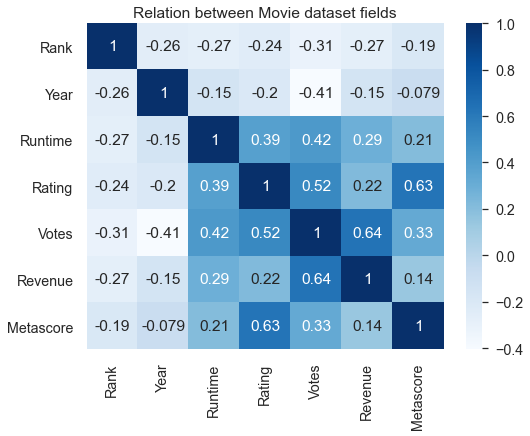

In [18]:
# Checking the correlation between the columns through heatmap
figure = plt.figure(figsize=(8,6))
sns.heatmap(data=df_movies.corr(), annot=True,cmap='Blues',xticklabels=True, yticklabels=True).set_title("Relation between Movie dataset fields")

- **From the above graph, we can observe that below fields have mild high correlation**
    - Rating and Metascore
    - Revenue and Votes
    - Votes and rating

- **While below fields have very low correlation**
    - Rating and Revenue
    - Runtime and revenue
    - Rank and year are negatively correlated with other fields.

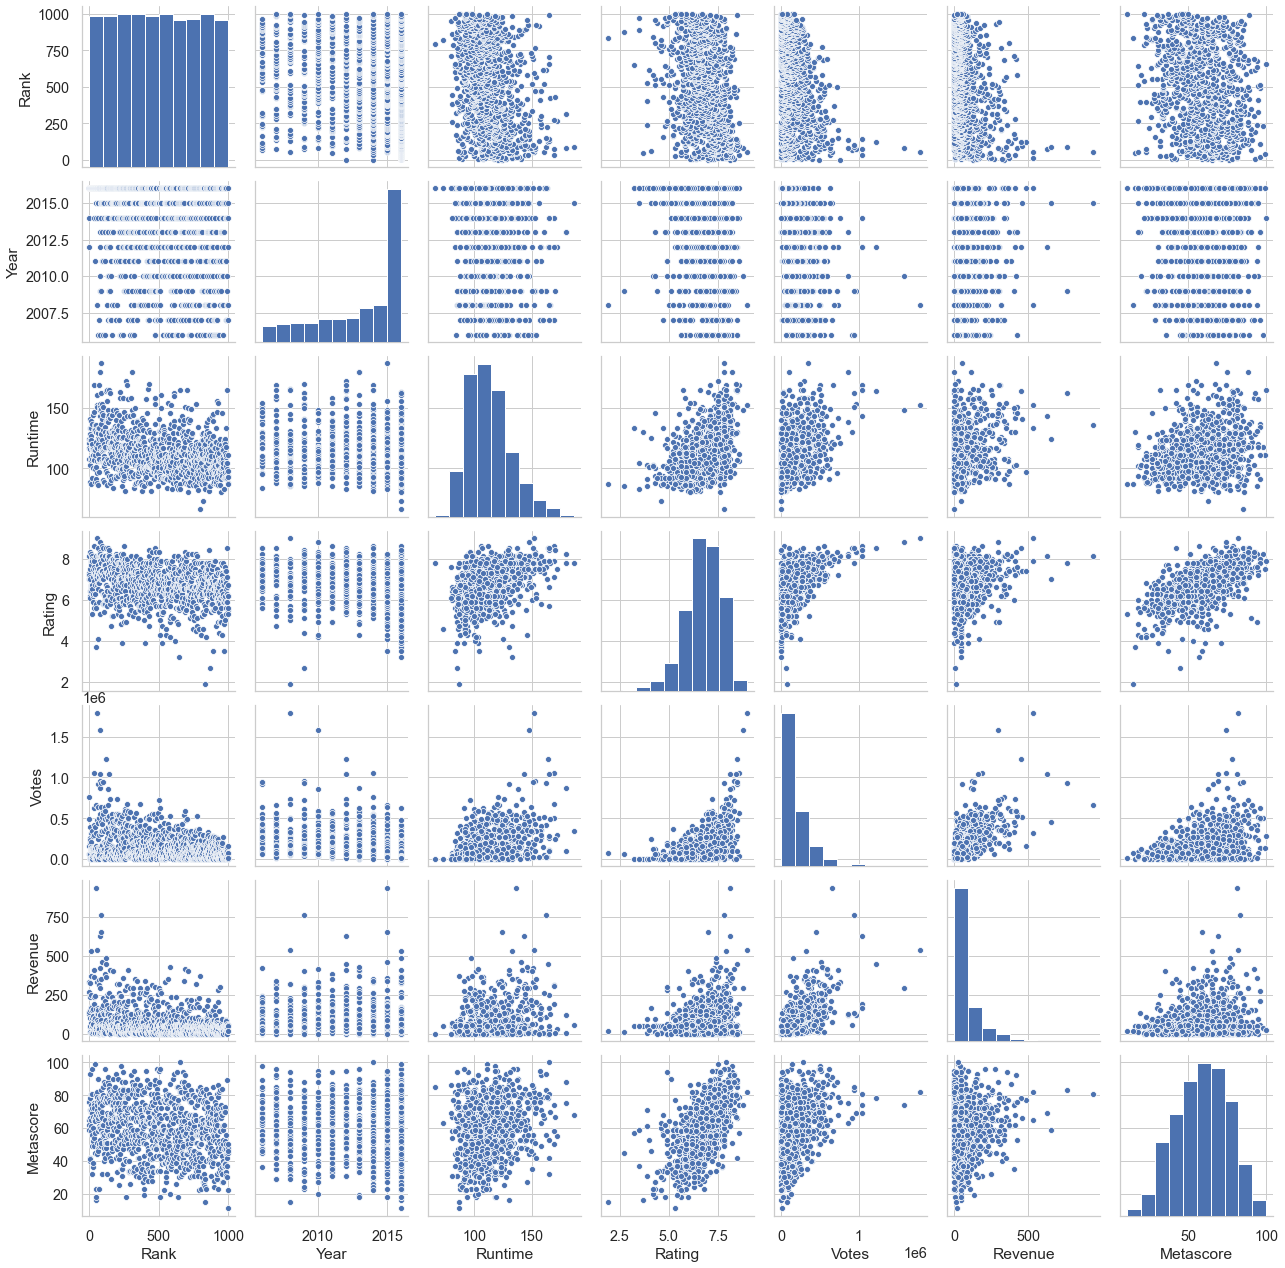

In [19]:
# Checking the correlation between the columns through pairplot
sns.pairplot(df_movies)

- The year plot is right-skewed denoting the number of movies increased over the year. 
- Revenue and run-time plot, we can observe that the movies for rumtime 120-160 have earned maximum revenue.
- Revenue and rating plot, shows that high revenue movies have ratings higher than 7
- Rating and metascore have linear relationship.
- Votes plots are left-skewed as average numbers of votes decreased over the years.
- Mild linear trend between votes and revenue, as most of the movies earned more than 500 have more than 500000 votes.
- Revenue is right-skewed as average revenue decreased over the year.
- Metascore is constant over the year and also no imapct on revenue of any movie


<a id='section_5.1'></a>
### 4.1 Analysis based on movie directors


<a id='section_5.1.1'></a>
#### 5.1.1 Top directors with higher Revenue

Text(0.5, 1.0, 'Director-wise revenue')

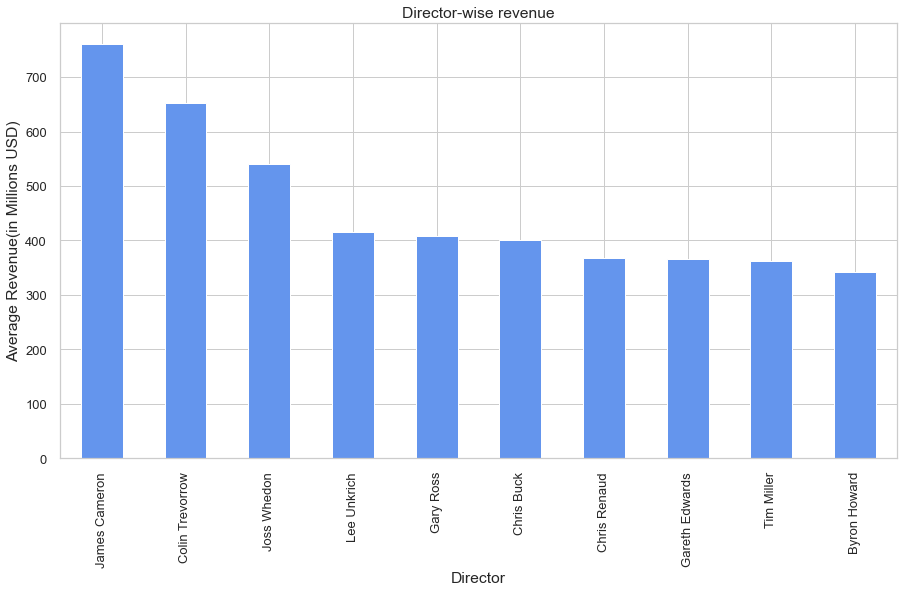

In [20]:
# Find the top 10 directors by average revenue
df_movies.groupby(['Director'])['Revenue'].mean().sort_values(ascending=False)[:10].plot(
    kind='bar', figsize=(15,8), fontsize=13, color='cornflowerblue')
plt.ylabel('Average Revenue(in Millions USD)')
plt.title("Director-wise revenue")

In [21]:
# Find top 5 directors by Number of movies directed to know the most active directors
df_movies.Director.value_counts().head(5)

Ridley Scott          8
M. Night Shyamalan    6
Michael Bay           6
David Yates           6
Paul W.S. Anderson    6
Name: Director, dtype: int64

<a id='section_5.1.2'></a>
#### 5.1.2 Top directors with higher Votes

Text(0.5, 1.02, 'Top 10 Directors by Votes')

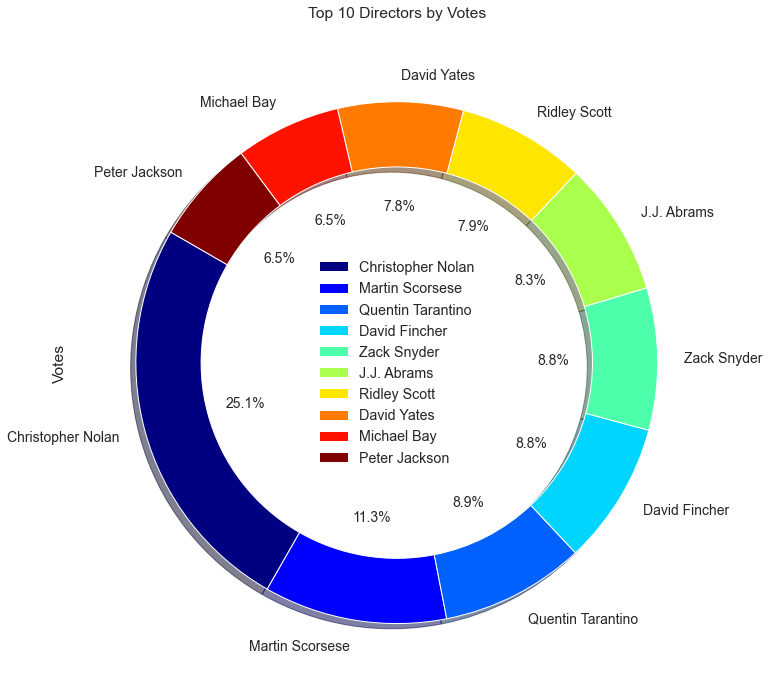

In [22]:
# Find the top 10 directors by higher votes
plt.figure(figsize=(12,12))
ax = df_movies.groupby(['Director'])['Votes'].sum().sort_values(ascending=False)[:10].plot.pie(
    fontsize=14, autopct='%3.1f%%', wedgeprops=dict(width=0.25), shadow=True, startangle=150, cmap='jet', legend=True);
ax.set_title('Top 10 Directors by Votes', y=1.02)

<a id='section_5.1.3'></a>
#### 5.1.3 Top directors with higher Ratings

Text(0.5, 1.0, 'Directors with maximum Ratings received')

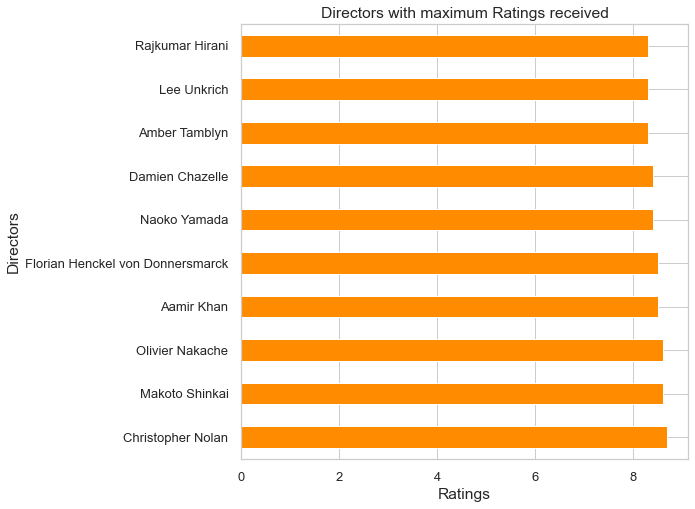

In [24]:
# Find the top 10 directors by higher Ratings
df_movies.groupby(['Director'])['Rating'].mean().sort_values(ascending=False)[:10].plot(
    kind='barh', figsize=(8,8), fontsize=13, color='darkorange')
plt.ylabel('Directors')
plt.xlabel('Ratings')
plt.title("Directors with maximum Ratings received")

<a id='section_5.1.4'></a>
#### 5.1.4 Top directors with higher Metascore

Text(0.5, 1.0, 'Directors with maximum Metascores received')

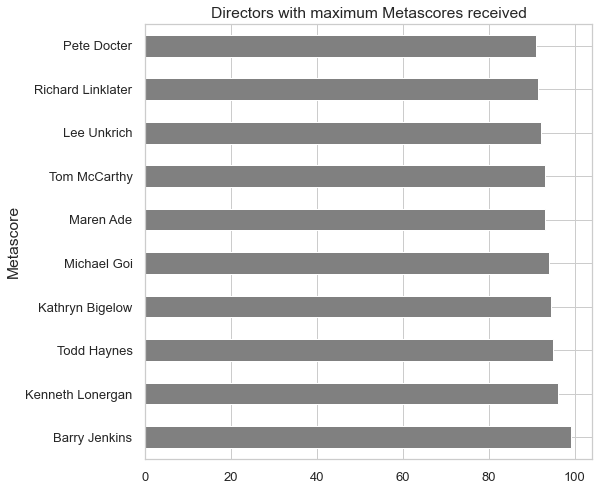

In [25]:
# Find the top 5 directors by higher Metascore
df_movies.groupby(['Director'])['Metascore'].mean().sort_values(ascending=False)[:10].plot(
    kind='barh', figsize=(8,8), fontsize=13, color='gray')
plt.ylabel('Metascore')
plt.title("Directors with maximum Metascores received")

#### From the above analysis we can observe that:
- James Cameron has the highest revenue.
- Ridley Scott is most active and have directed maximum no. of movies during 2006 to 2016
- Viewers liked Christopher Nolan's movies as he has the maximum votes and the rating
- Movie critics mostly liked Berry Jenkin's movies

<a id='section_5.2'></a>
### 5.2 Analysis on runtime of movies


<a id='section_5.2.1'></a>
#### 5.2.1 How long movie run time is generally ?

Text(0, 0.5, 'Movie count')

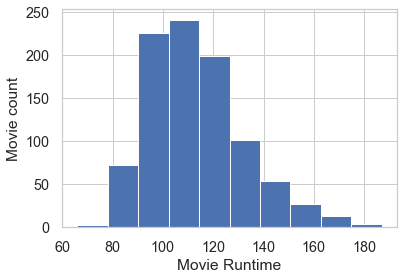

In [26]:
# Plot the distribution of the Runtime
df_movies.Runtime.plot.hist()
plt.xlabel('Movie Runtime')
plt.ylabel('Movie count')

<a id='section_5.2.2'></a>
#### 5.2.2 Which interval of Runtime receives higher revenue ?

Text(0, 0.5, 'Runtime')

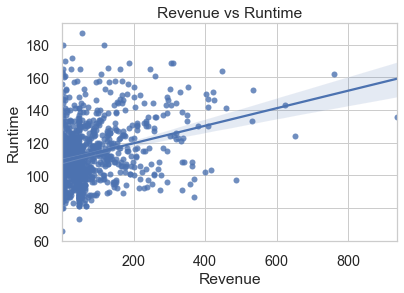

In [27]:
# Find the top relation between Runtime and Revenue
plt.title("Revenue vs Runtime")
sns.regplot(data=df_movies, x="Revenue", y="Runtime")
plt.ylabel("Runtime")

#### From the above analysis we can observe that:
- Mostly movies have runtime of 100 to 120 minutes
- Movies with runtime, 100-150 have earned maximum revenue, so the movies which are too short or too long have not earned much revenue over the year.

<a id='section_5.3'></a>
### 5.3 Analysis of movie Genres

<a id='section_5.3.1'></a>
#### 5.3.1 Top genres by movie count

In [28]:
# Find the unique genres and their count by movies
unique_genres = pd.unique(df_movies['Genre'].str.split(',', expand=True).stack()).tolist()
print('The total number of different geners =', len(unique_genres))
print(unique_genres)

The total number of different geners = 20
['Action', 'Adventure', 'Sci-Fi', 'Mystery', 'Horror', 'Thriller', 'Animation', 'Comedy', 'Family', 'Fantasy', 'Drama', 'Music', 'Biography', 'Romance', 'History', 'Crime', 'Western', 'War', 'Musical', 'Sport']


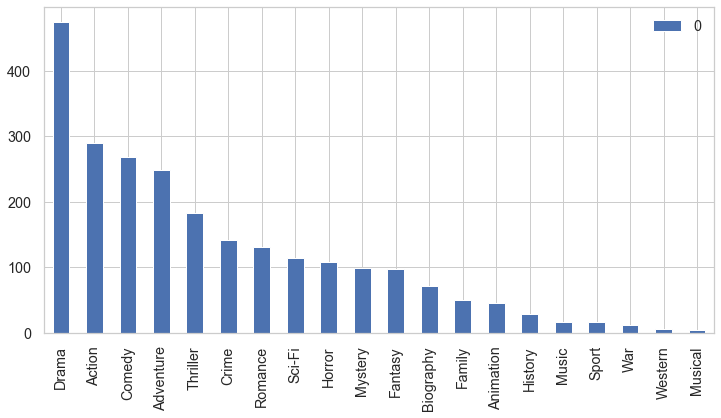

In [29]:
# Find the top genres by movie count 
df_genre_dist = df_movies.set_index('Year')['Genre'].str.get_dummies(',')[unique_genres].sum(
    level=0).sort_index(axis = 0).sum().sort_values(ascending=False).to_frame()
df_genre_dist.plot(kind='bar', figsize=(12,6))

In [ ]:
# # Check the count of the movies by each genre year wise 
# for genre in unique_genres:
#     df = df_movies['Genre'].str.contains(genre).fillna(False)
#     f, ax = plt.subplots(figsize=(10, 6))
#     sns.countplot(x='Year', data=df_movies[df], palette="Greens_d");
#     plt.title(genre)

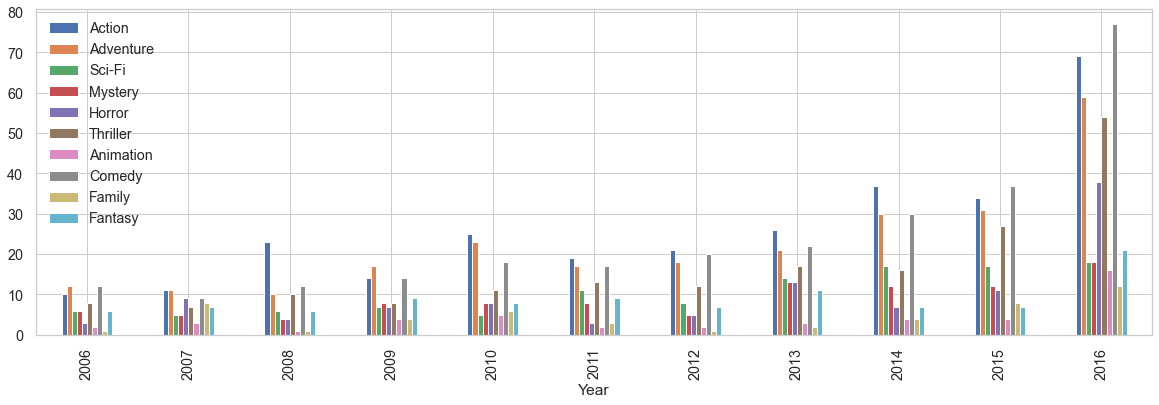

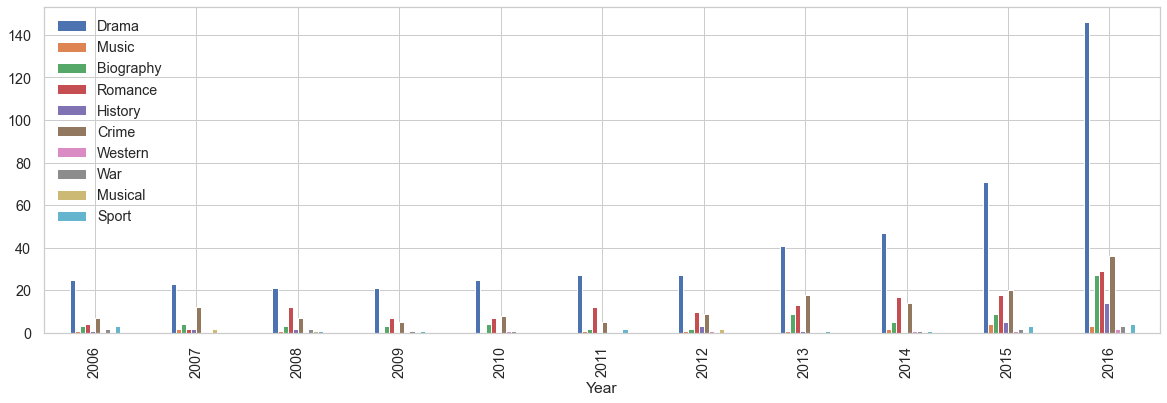

In [30]:
# Putting 10 genres at a time to understand the gener wise movie count per year

genre_Set1 = unique_genres[:(round(len(unique_genres)/2))]
genre_Set2 = unique_genres[(round(len(unique_genres)/2)):]

df1 = df_movies.set_index('Year')['Genre'].str.get_dummies(',')[genre_Set1].sum(level=0).sort_index(axis = 0)
df1.plot.bar(figsize=(20,6))

df2 = df_movies.set_index('Year')['Genre'].str.get_dummies(',')[genre_Set2].sum(level=0).sort_index(axis = 0)
df2.plot.bar(figsize=(20,6) )

<a id='section_5.3.2'></a>
#### 5.3.2 Top genres by revenue

Text(0.5, 1.0, 'Genre wise Revenue')

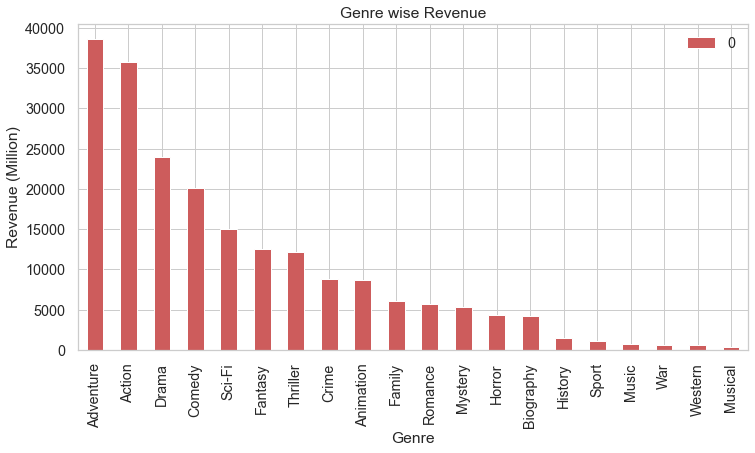

In [31]:
# Find the top 10 genres by revenue
df_genre_by_revenue = df_movies.assign(Genre=df_movies['Genre'].str.split(',')).explode(
    'Genre').groupby(['Year','Genre'])['Revenue'].sum().unstack(1).fillna(0)
df_genre_by_revenue.sum().sort_values(ascending=False).to_frame().plot(kind='bar', figsize=(12,6), color='indianred')
plt.ylabel('Revenue (Million)')
plt.title('Genre wise Revenue')

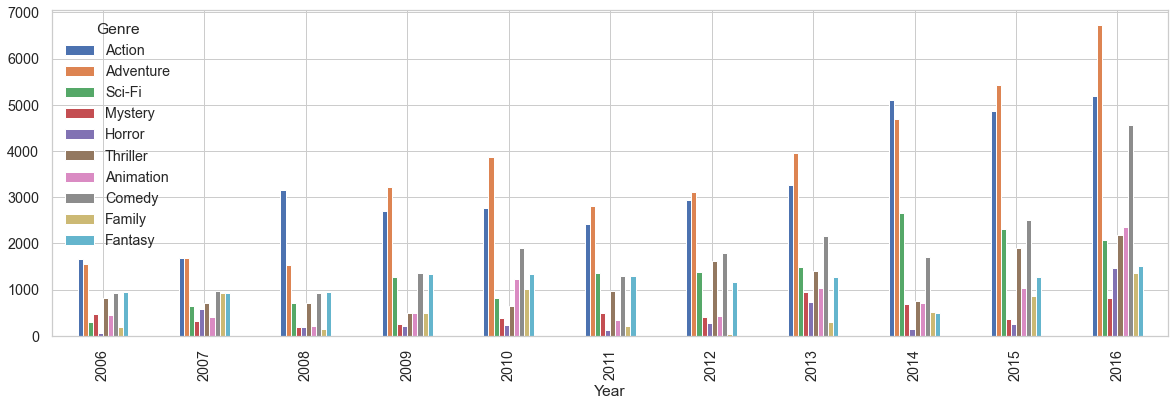

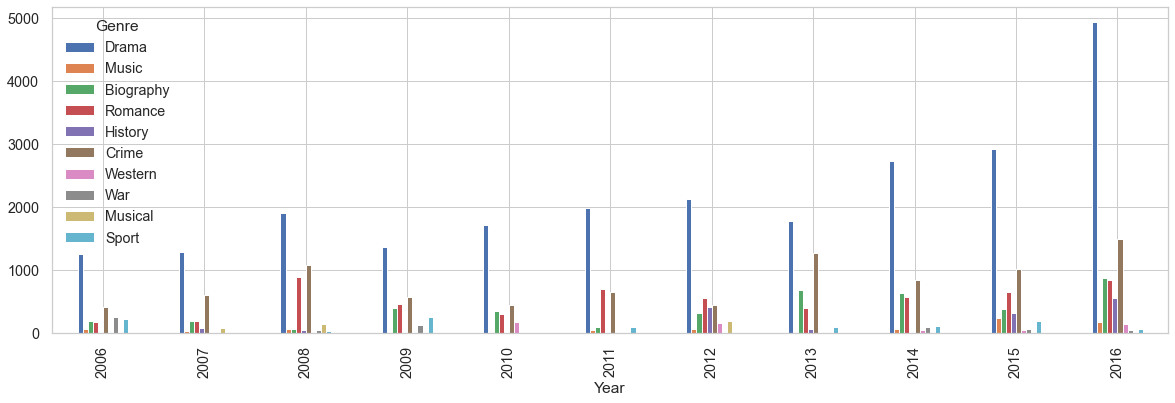

In [32]:
# Putting 10 genres at a time to understand the total revenue per year each gener wise
df_genre_by_revenue[genre_Set1].plot.bar(figsize=(20,6))
df_genre_by_revenue[genre_Set2].plot.bar(figsize=(20,6))

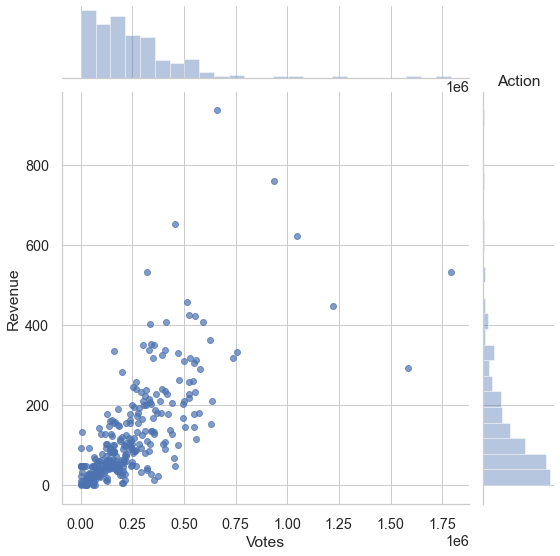

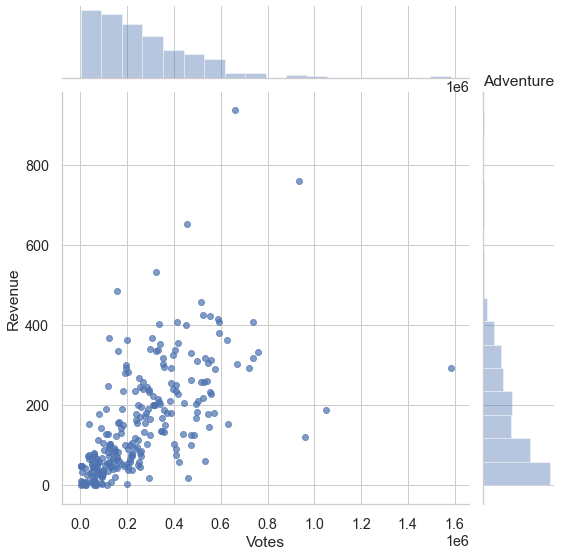

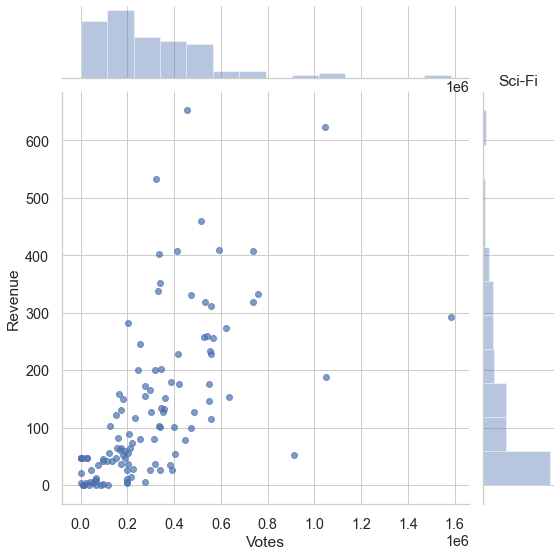

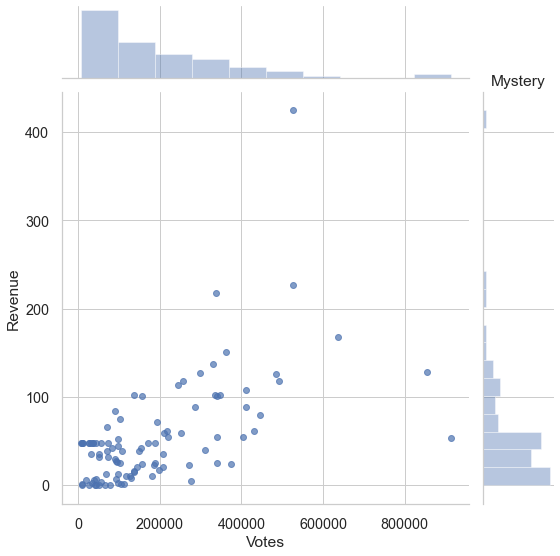

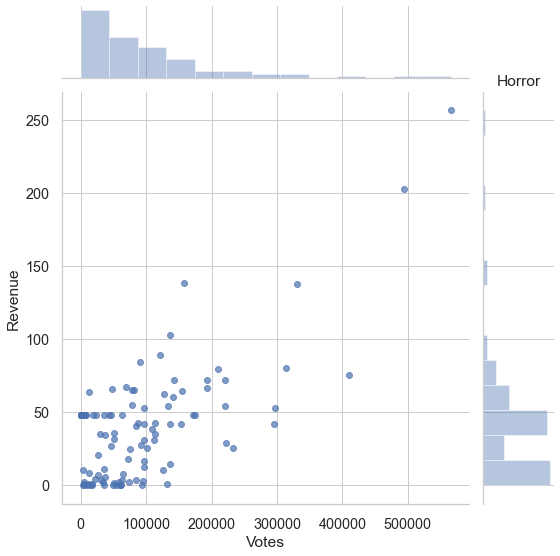

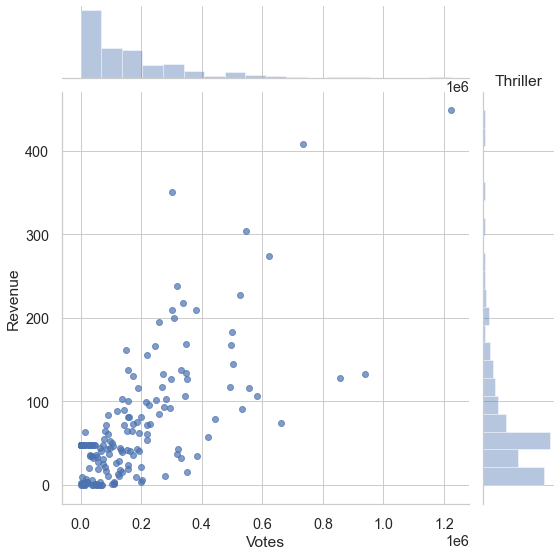

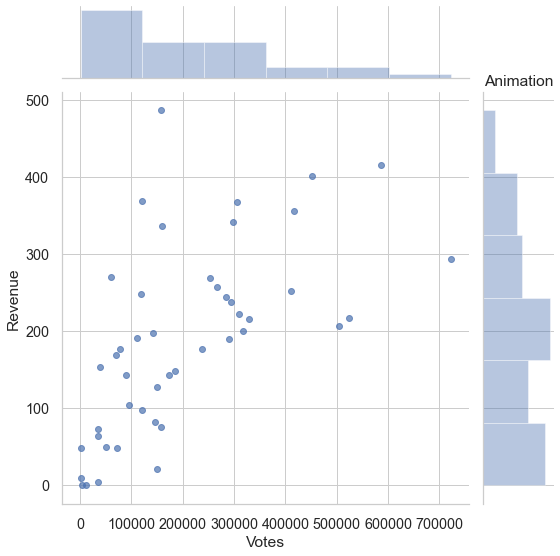

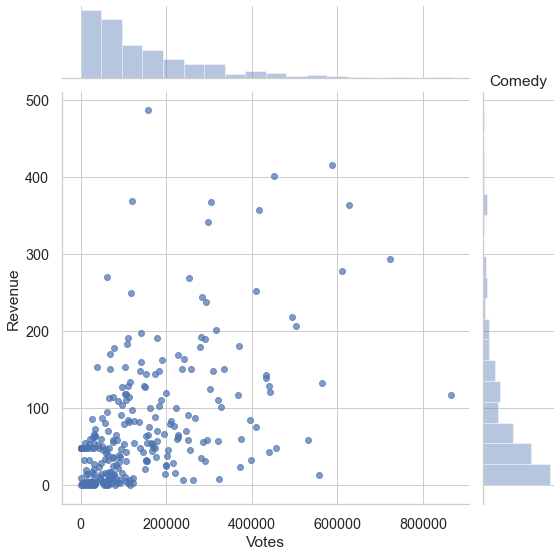

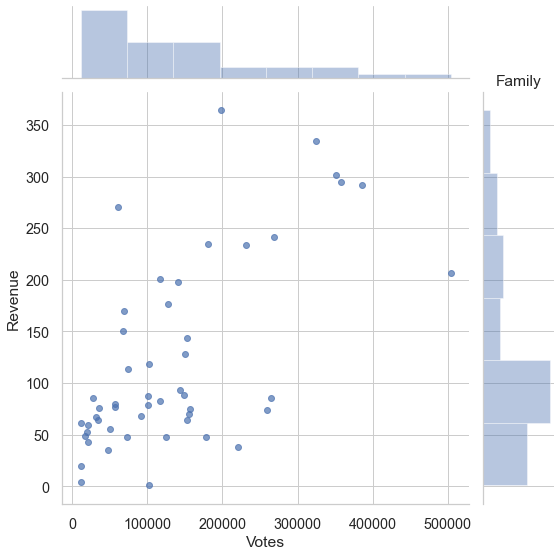

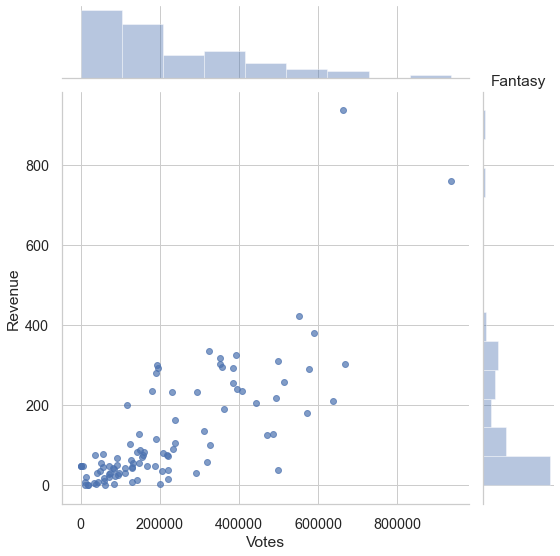

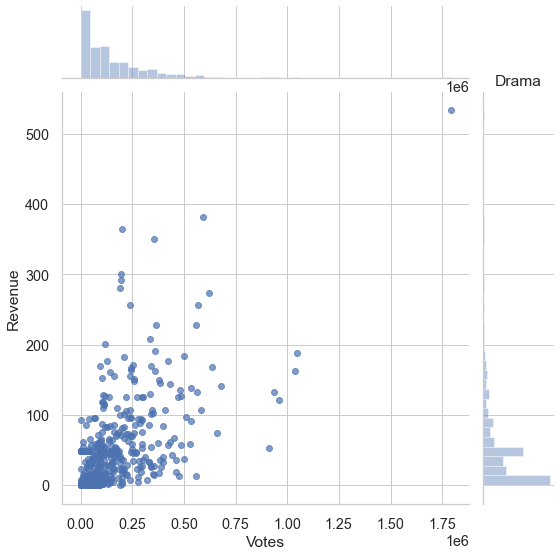

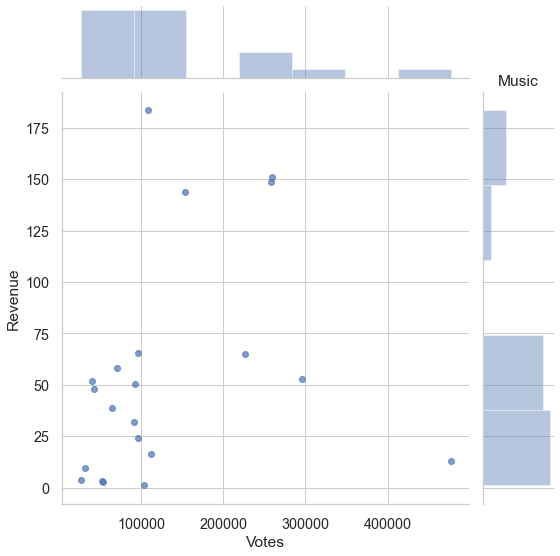

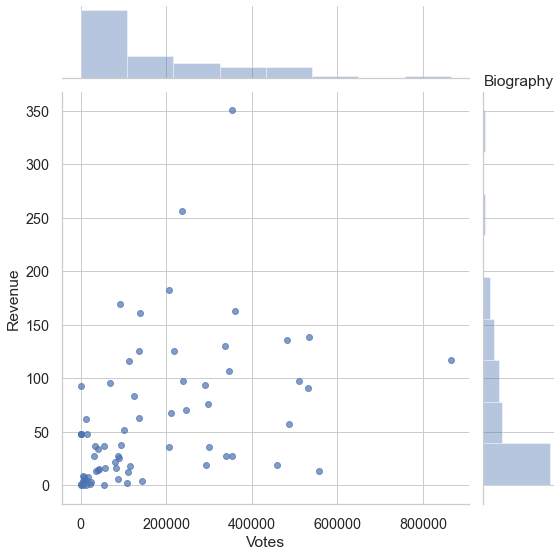

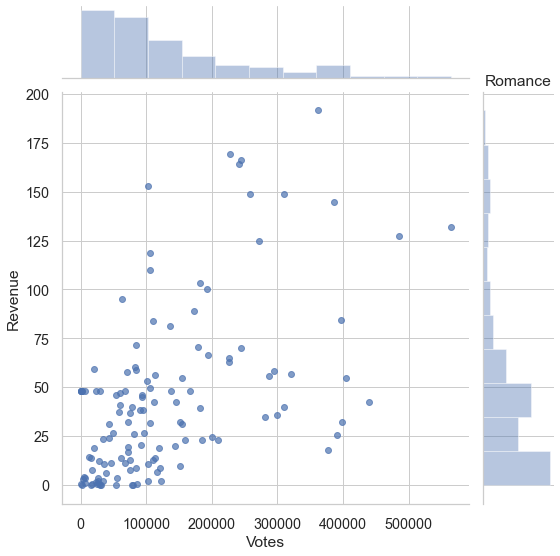

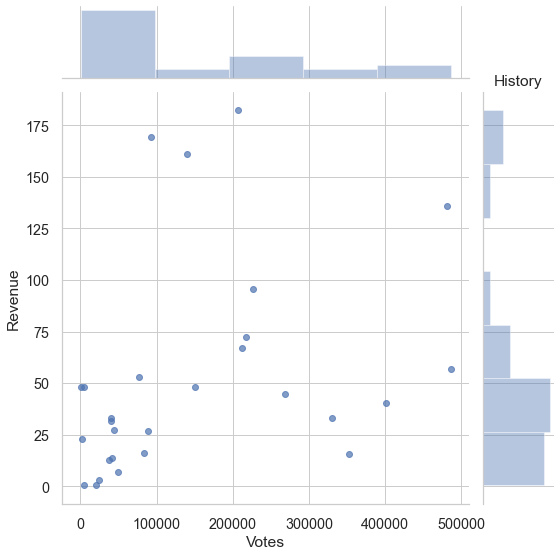

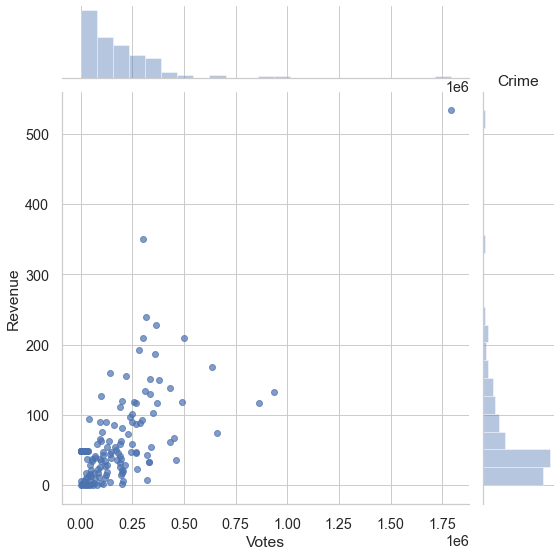

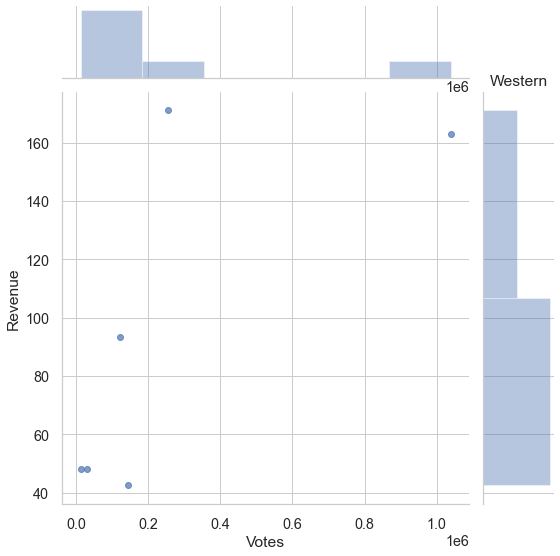

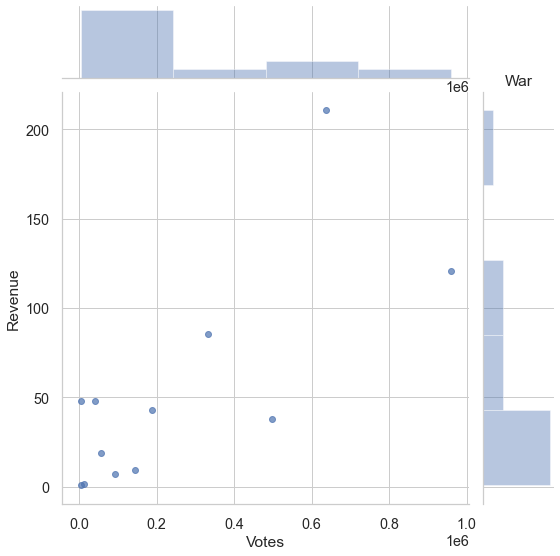

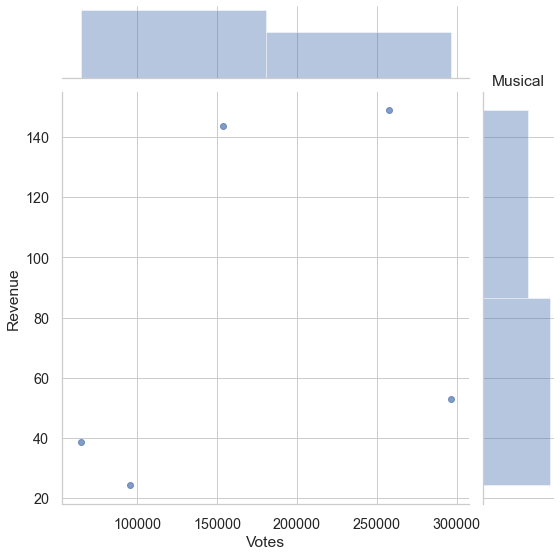

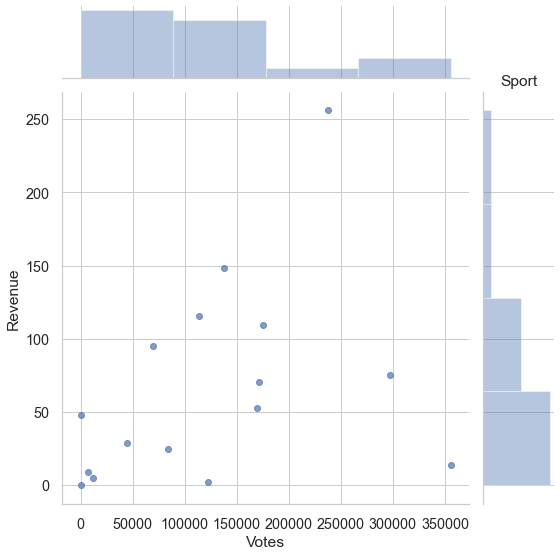

In [33]:
# Analysing the effect of 'Runtime', 'Votes','Revenue', 'Metascore' on each genre using jointplot

# compare_by = ['Runtime', 'Votes','Revenue', 'Metascore']
compare_by = ['Revenue']
compare_with = 'Votes'

for genre in unique_genres:
    df = df_movies['Genre'].str.contains(genre).fillna(False)
    for compare in compare_by:
        sns.jointplot(x=compare_with, y=compare, data=df_movies[df], alpha=0.7, color='b', size=8)
        plt.title(genre)

#### From the above analysis we can observe that:
 - During 2006 to 2016 more Drama movies were produced followed by Action, Comedy and Adventure
 - Adventure genre has earned most revenue followed by Action, Drama, and Comedy.
 - Sports, War, Music, Western genre has not made much revneue
 - In 2016 there is increase in production of Horror, Thriller and Comedy movies but Comedy earned more revenue followed by Thriller and Horror.
 - Any combination of genre Adventure, Action, Drama, and Comedy may give the good revenue

<a id='section_5.4'></a>
### 5.4. Analysis of Movie Industry growth

<a id='section_5.4.1'></a>
#### 5.4.1 Is the number of movies increasing over the years ?


Text(0.5, 1.0, 'Number of Movies released by Years')

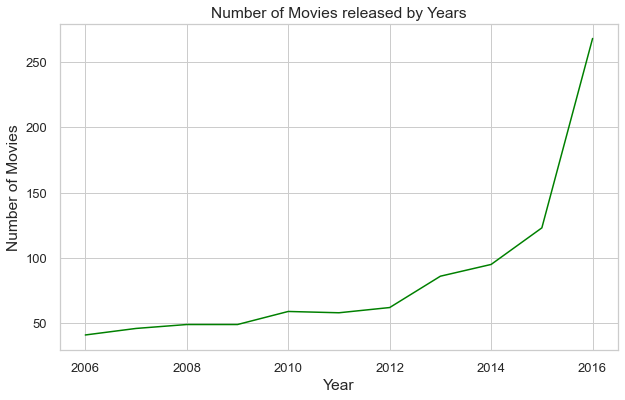

In [34]:
# Find the count of movies year wise
df_movies.groupby(['Year'])['Title'].count().plot(kind='line', figsize=(10,6), fontsize=13, color='green')
plt.ylabel('Number of Movies')
plt.title("Number of Movies released by Years")

<a id='section_5.4.2'></a>
#### 5.4.2 Is the revenue from movies increasing over the years ?

       

Text(0.5, 1.0, 'Movie Revenue per Year')

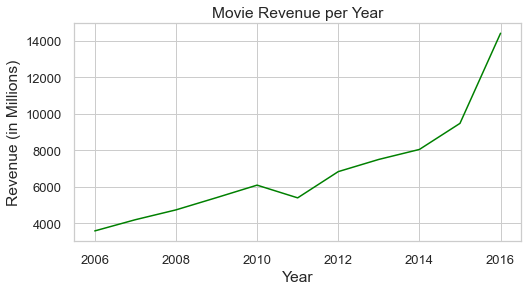

In [35]:
# Find the total Revenue for each year
df_movies.groupby(['Year'])['Revenue'].sum().plot(kind='line', figsize=(8,4), fontsize=13, color='green')
plt.ylabel('Revenue (in Millions)')
plt.title("Movie Revenue per Year")

<a id='section_5.4.3'></a>
#### 5.4.3 Is the average revenue of the movies increasing over the years ?

Text(0.5, 1.0, 'Average Revenue per Year')

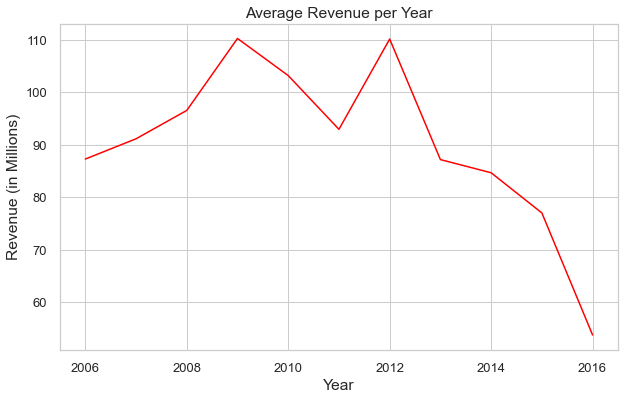

In [36]:
# Find the average revenue of the movies year wise
df_movies.groupby(['Year'])['Revenue'].mean().plot(kind='line', figsize=(10,6), fontsize=13, color='red')
plt.ylabel('Revenue (in Millions)')
plt.title("Average Revenue per Year")

<a id='section_5.4.4'></a>
#### 5.4.4 Is the popularity of the movies increasing over the years?

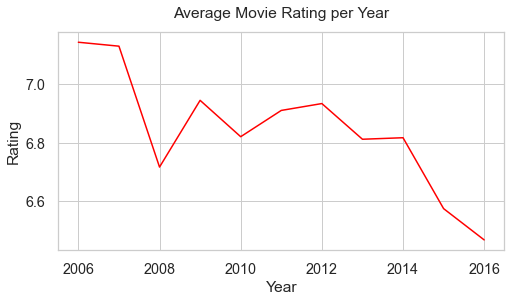

In [37]:
# Find the popularity of the movies year wise
movies_rating = df_movies.groupby('Year')['Rating'].mean()
ax = movies_rating.plot.line( figsize=(8,4), color='red');
ax.set_title('Average Movie Rating per Year', y=1.04)
ax.set_ylabel('Rating');

#### From the above analysis we can observe that:
 
- The number of movies releasing per year has increased significantly.
- The revenue from movies over the last 10 year period is showing an upward trend. 
- The number of movies released in 2016 are much more when compared to other years and that could be the reason the revenue generation is huge in 2016 when compared to other years
- The average revenue of movies per year decreasing, while the total revenue of movies is increasing over the years.This is most probably because of the fact the total number of movies released per year is increasing. This trend indicates, more producers are coming into the industry and there is huge competition in the industry. As a result, in a year, multiple movies gets released around the same time and the revenue gets distributed among them. So the average revenue of movies in a year also decreases.

<a id='section_6'></a>
### 6. Conclusion

This section draws the conclusion from the exploration done on the dataset in Section 4.

<strong>Director</strong>

1. James Cameron has earned the highest revenue but has directed only 1 movie in the 10 year period.
2. Christopher Nolan's movies are the most popular among viewers in the 10 year period. 
3. Critics liked Barry Jenkins's movies the most. He is closely followed by Kenneth Lonergan and Todd Haynes
4. So probably finding the Director only by the Average Revenue, Average Rating, Average Metascore may not be a good idea.

<strong>Runtime</strong>

1. Mostly movies have runtime of 100 to 120 minutes
2. Movies with runtime, 100-150 have earned maximum revenue, so the movies which are too short or too long have not earned much revenue over the year.

<strong>Genre</strong>

1. During 2006 to 2016 more Drama movies were produced followed by Action, Comedy and Adventure
2. Adventure genre has earned most revenue followed by Action, Drama, and Comedy.
3. Sports, War, Music, Western genre has not made much revneue
4. In 2016 there is increase in production of Horror, Thriller and Comedy movies but Comedy earned more revenue followed by Thriller and Horror.
5. Any combination of genre Adventure, Action, Drama, and Comedy may give the good revenue

<strong>Industry Growth</strong>
1. Industry is growing as the number of movies released and the total revenue has increased year by year.
2. The average revenue of movies per year decreasing, while the total revenue of movies is increasing over the years. This is  because of more movies released in the industry.
3. The number of movies released in 2016 are much more when compared to other years and that could be the reason the revenue generation is huge in 2016 when compared to other years.
4. This trend indicates, more producers are coming into the industry and there is huge competition in the industry. As a result, in a year, multiple movies gets released around the same time and the revenue gets distributed among them. So the average revenue of movies in a year also decreases.

<a id='section_7'></a>
### 7. Actionable Insights

#### To achieve the  goal as mentioned in the Problem Statement, MS Films should consider the following conclusions drawn from the EDA done.


1. The movie industry is growing very fast. to get the good business, produce more movies using the best features (explained below).

2. Produce movies with active directors. Christopher Nolan's movies may get more Revenue, Rating and Metascore.

3. Produce movies that should have atleast 120 minutes runtime.

4. To get the maximum revenue, produce movies having the combination of the genres Adventure, Action, Drama, and Comedy

5. Produce movies that will satisfy both People and Critics